### Setting up the Python work environment
We're going to start by importing a few packages that Python uses to do the jobs we'll need. Calcuations using matrices, plotting graphs, and so on. These aren't really important to understand at the moment.

To run these little blocks of code, hover your mouse over the number in the top left hand corner (e.g., [2] below), and press the "play" icon. Run each block of code you come across.

In [ ]:
# This cell loads libraries that we need
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib as mpltlb

### The Gordon-Shaefer harvested population model

One of the earliest applications of mathematics in applied ecology was for the management of fisheries. In the absence of harvest pressure, populations of fish will increase when they are at low abundance, and decrease when their abundance outstrips the capacity of the environment.

The [Gordon-Schaefer](https://en.wikipedia.org/wiki/Gordon-Schaefer_model) model describes these dynamics using the a simple discrete time recurrence equation, along the lines of:

$n_{t+1} = n_t + r n_t (1 - \frac{n_t}{K}) - h n_t$

Here, $n_{t}$ is the size of the population in year $t$ (e.g., if the abundance of the Australian east coast humpback whale population was $20000$ in 2010, then $n_{2010} = 20000$). At its lowest, their abundance dropped to approximately $n_{1955} = 500$ 

The value of $r$ tells us about the intrinsic growth rate of the population, where large values indicate fast growth and small values indicate slow growth. We believe the humpback growth rate is approximately $r=1.08$ The parameter $K$ tell us the maximum population that the system can support - for humpbacks on the east coast, we believe this value is around $30000$.

Let's start by entering the values of the parameters into the workspace. 

In [ ]:
# This cell sets the value of the variable chosen_r 
# then plots the dynamical system for 100 time-steps
r = 0.08 # set the growth rate at 8% per year
K = 30000; # set the maximum possible population size
n = 500; # set the initial population size
h = 0; # set the harvest rate to zero to start with.


Let's just try a couple of timestep iterations of the Gordon-Shaefer model, to see what happens. 

In [ ]:
n_1 = 500
n_2 = n_1 + r*n_1*(1-n_1/K) - h*n_1
n_3 = n_2 + r*n_2*(1-n_2/K) - h*n_2
print("Abundance in year 2 is ", round(n_2))
print("Abundance in year 3 is ", round(n_3))

Abundance in year 2 is  539
Abundance in year 3 is  582


So this population is going to grow over time. This makes sense, since it starts off well below carrying capacity, since it has an 8% growth rate, and since there is currently no fishing harvest going on ($h=0$).

### Simulating the population over many years

So now we can use a FOR loop to simulate the population for a lot of years. First, we set up two vectors (ns and ts) that will store the population size and year throughout the simulation.

Without fishing, the population reaches 29982


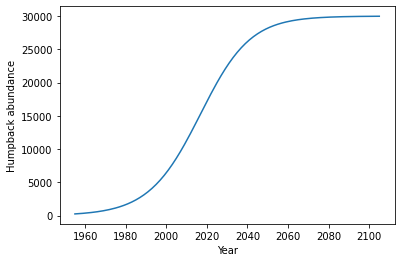

In [ ]:
Y = 150; # set the number of years to simulate over
n = 250; # set the initial population size again, very low this time.
h = 0; # set the harvest rate to zero

ns = np.zeros(Y+1); # This vector will store the population size
ts = np.zeros(Y+1); # This vector will store the year
ys = range(0,Y+1);

for y in ys:
	# Record the current value of x for plotting
	ns[y] = n;
	ts[y] = y+1955;
	# Now apply the logistic map to the current value of x,
	# yielding a new value of x.
	n = n + r * n * (1 - n/K) - h*n;

Population_no_fishing = n
print("Without fishing, the population reaches",round(Population_no_fishing))
plt.plot(ts, ns, '-');
plt.xlabel("Year");
plt.ylabel("Humpback abundance");

This figure shows the classic logistic curve, with a slow initial rate of increase (since the population is small and doesn't produce a lot of offspring), followed by a rapid phase. Finally, as the population approaches its carrying capacity, resource constraints, disease, predation and such forces slow the growth down to zero.

### Calculating the maximum sustainable harvest rate for the population

Now let's allow the harvest rate to be nonzero. Every year, we're going to remove a proportion $h$ of the population, and sell it to make some revenue. We want to choose a value of $h$ that maximises this revenue over the long-term.

In [ ]:
# With only a single fisher in the system
# fiddle with their harvest rate to maximise their profits

## SET A HARVEST RATE IN THE LINE BELOW. CHOOSE A NUMBER BETWEEN 0 AND 1 ###
h = 0; # set the harvest rate
Y = 1000; # set the number of years to simulate over
n = 20000; # set the initial population size again, very low this time.

ys = range(0,Y+1);
for y in ys:
    n = n + r*n*(1-n/K) - h*n;

# determine the equilibrium profit
EquilProfit = h*n; 
MSY_Single = EquilProfit
print('The fish stock declines to =', round(n))
print('MSY for a single fisher =', round(MSY_Single))

The fish stock declines to = 30000
MSY for a single fisher = 0


This is the single-owner MSY. That is, the maximum sustainable yield when a single fisher controls the whole population.